In [ ]:
## Consumer Purchase Behavior Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/customer_purchase_data.csv'
df = pd.read_csv(file_path)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Building the model

In [ ]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
## Gender = 0(Male)
## Gender = 1(Female)

In [ ]:
df.shape

(1500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [ ]:
## No missing values in our dataset

In [ ]:
## There is no need to delete columns from our dataset as all of them are relevant for our prediction

In [ ]:
df.corr()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.022055,0.016438,-0.038778,-0.020767,0.032309,-0.005980,0.004009,-0.255747
Gender,0.022055,1.000000,0.010054,0.001373,-0.028572,0.012814,0.033302,-0.056624,0.002627
AnnualIncome,0.016438,0.010054,1.000000,0.000276,0.032163,-0.001505,-0.045296,0.016393,0.188214
NumberOfPurchases,-0.038778,0.001373,0.000276,1.000000,0.006270,0.024644,0.055358,0.029581,0.222691
ProductCategory,-0.020767,-0.028572,0.032163,0.006270,1.000000,-0.011013,0.026680,0.034369,0.007346
TimeSpentOnWebsite,0.032309,0.012814,-0.001505,0.024644,-0.011013,1.000000,0.005965,0.001240,0.277112
LoyaltyProgram,-0.005980,0.033302,-0.045296,0.055358,0.026680,0.005965,1.000000,-0.048462,0.310838
DiscountsAvailed,0.004009,-0.056624,0.016393,0.029581,0.034369,0.001240,-0.048462,1.000000,0.303297
PurchaseStatus,-0.255747,0.002627,0.188214,0.222691,0.007346,0.277112,0.310838,0.303297,1.000000


<Axes: >

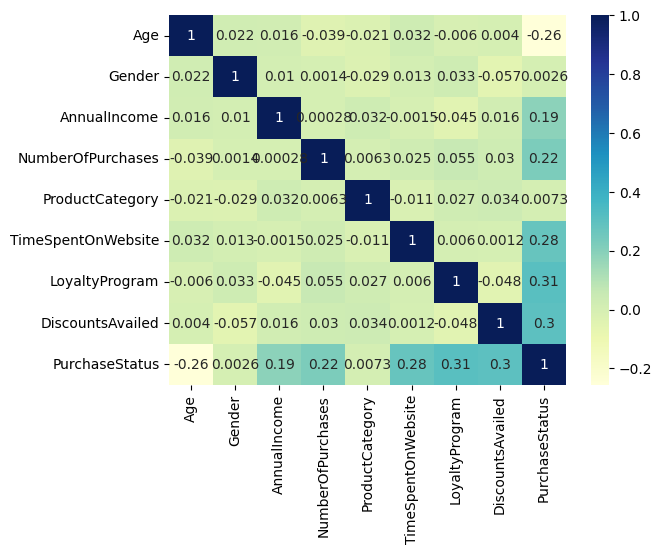

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [ ]:
df.duplicated().sum()

112

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(1388, 9)

In [ ]:
df['Age'].max()

70

In [ ]:
df['Age'].min()

18

<Axes: ylabel='count'>

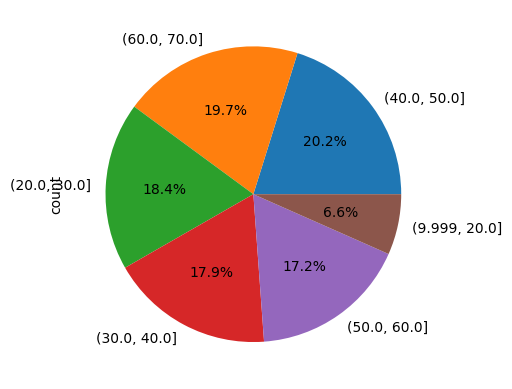

In [ ]:
## Segregating based on age
df.Age.value_counts(bins=[10,20,30,40,50,60,70]).plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

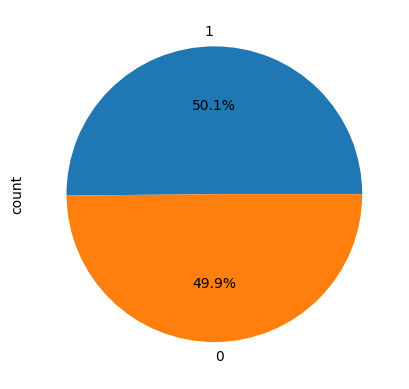

In [ ]:
df.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
df.ProductCategory.value_counts().sort_values(ascending=True)

,count
ProductCategory,
2,254
0,269
3,270
4,289
1,306


In [ ]:
df.AnnualIncome.value_counts(bins=10).sort_values(ascending=True)

,count
"(32979.879, 45958.245]",120
"(84893.344, 97871.711]",130
"(136806.81, 149785.176]",135
"(123828.444, 136806.81]",136
"(58936.612, 71914.978]",140
"(97871.711, 110850.077]",141
"(71914.978, 84893.344]",142
"(45958.245, 58936.612]",145
"(110850.077, 123828.444]",148
"(19871.728, 32979.879]",151


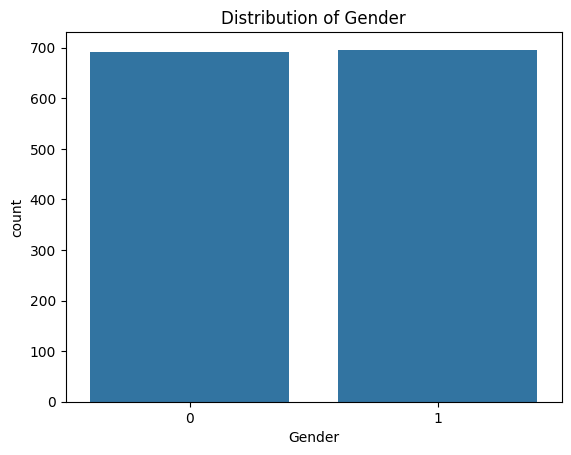

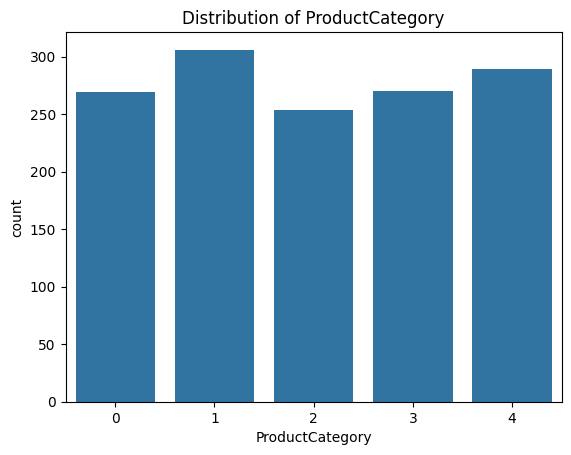

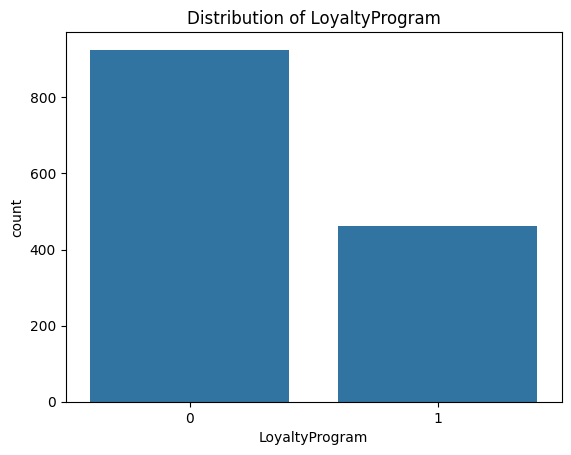

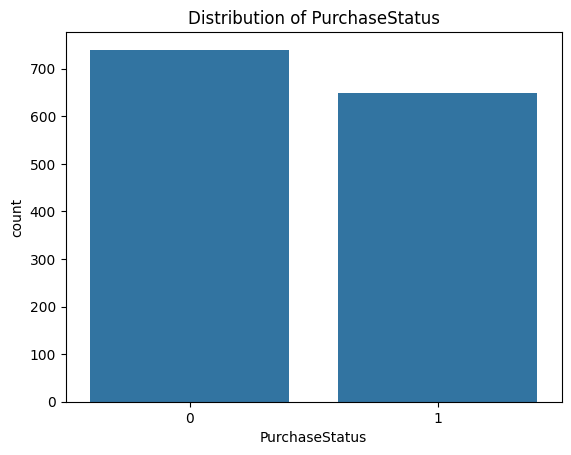

In [ ]:
## Plotting the distribution of Features

features1=['Gender','ProductCategory','LoyaltyProgram','PurchaseStatus']
for feature in features1:
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

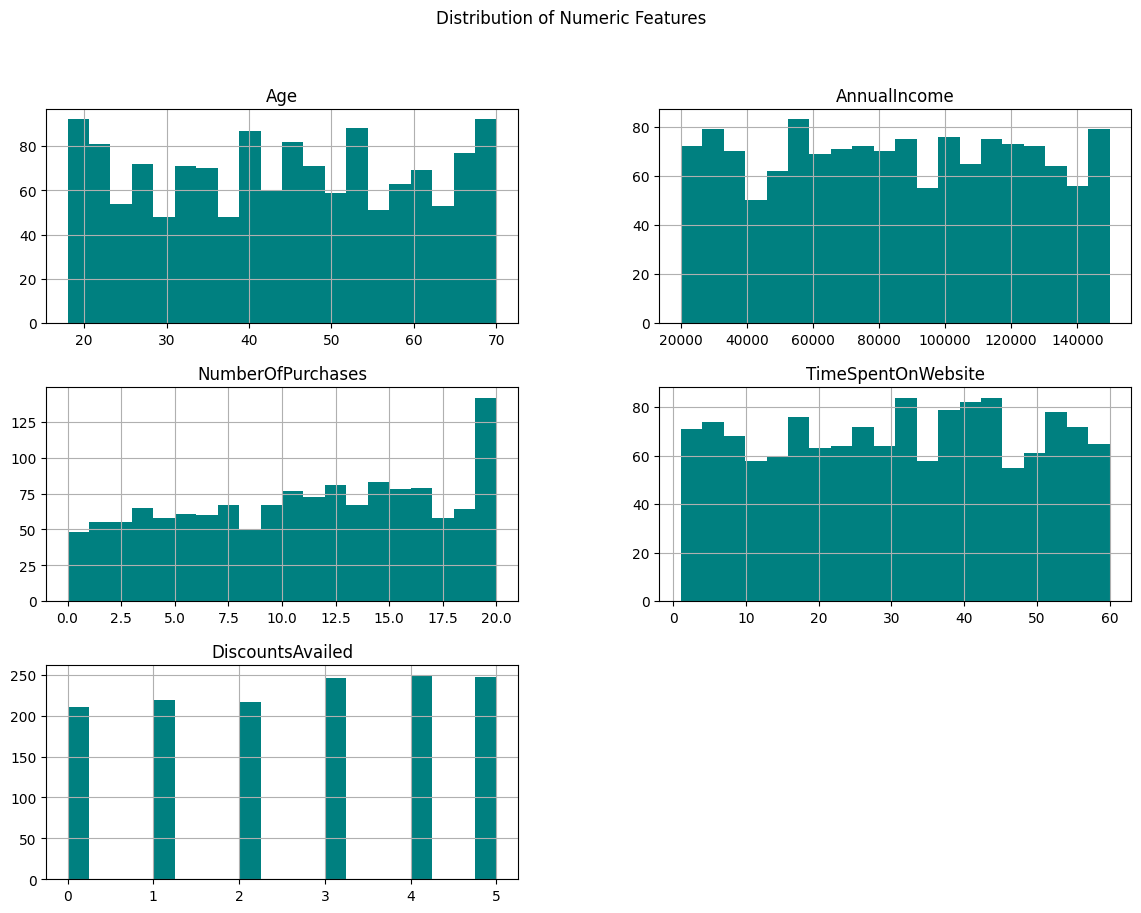

In [ ]:
features2 = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
df[features2].hist(bins=20, figsize=(14, 10), color='teal')
plt.suptitle('Distribution of Numeric Features')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_normalize = ["Age", "Gender", "NumberOfPurchases", "ProductCategory", "LoyaltyProgram", "DiscountsAvailed", "AnnualIncome", "TimeSpentOnWebsite"]

# Define the data to normalize
data_to_normalize = df[columns_to_normalize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
normalized_data = scaler.fit_transform(data_to_normalize)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Display the first few rows of the normalized data
normalized_df.head()

,Age,Gender,NumberOfPurchases,ProductCategory,LoyaltyProgram,DiscountsAvailed,AnnualIncome,TimeSpentOnWebsite
0,-0.254456,0.997122,-0.434443,-1.408161,-0.707489,1.406691,-0.495070,-0.010544
1,-1.546283,0.997122,-1.116191,-0.002026,-0.707489,1.406691,-1.628648,0.441498
2,-1.094144,0.997122,0.076869,-0.002026,1.413450,-1.535574,1.149081,0.052188
3,-1.287918,0.997122,1.440365,0.701041,-0.707489,0.818238,1.414947,0.908594
4,-0.835778,0.997122,1.440365,-0.705094,-0.707489,-1.535574,0.389098,-0.643694


In [ ]:
## Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target
X = normalized_df
y = df['PurchaseStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=40)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.86
Confusion Matrix:
[[201  26]
 [ 31 159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       227
           1       0.86      0.84      0.85       190

    accuracy                           0.86       417
   macro avg       0.86      0.86      0.86       417
weighted avg       0.86      0.86      0.86       417



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
## Hyperparameter tuning using Optuna

import optuna

def objective(trial):
    param = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]) # Removed 'auto'
    }

    model = DecisionTreeClassifier(**param, random_state=40)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_model = DecisionTreeClassifier(random_state=0, **best_params)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

[I 2024-09-11 23:01:00,119] A new study created in memory with name: no-name-6cce20c3-5b12-43f6-a488-57324c2a5092
[I 2024-09-11 23:01:00,159] Trial 0 finished with value: 0.6690647482014388 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6690647482014388.
[I 2024-09-11 23:01:00,198] Trial 1 finished with value: 0.8057553956834532 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8057553956834532.
[I 2024-09-11 23:01:00,221] Trial 2 finished with value: 0.8776978417266187 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 11, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 2 with value: 0.8776978417266187.
[I 2024-09-11 23:01:00,245] Trial 3 finished with value: 0.848

Best Hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}
Accuracy: 0.90
Confusion Matrix:
[[213  14]
 [ 26 164]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       227
           1       0.92      0.86      0.89       190

    accuracy                           0.90       417
   macro avg       0.91      0.90      0.90       417
weighted avg       0.90      0.90      0.90       417



Model accuracy improved from 0.86 to 0.90 after hyperparameter tuning.

In [ ]:
## Boosting Tree Models

## XG Boost Model

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

XGBoost Accuracy: 0.91
Confusion Matrix:
[[212  15]
 [ 23 167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       227
           1       0.92      0.88      0.90       190

    accuracy                           0.91       417
   macro avg       0.91      0.91      0.91       417
weighted avg       0.91      0.91      0.91       417



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00


In [ ]:
## CatBoosting

from catboost import CatBoostClassifier

# Initialize the CatBoost model
cat_model = CatBoostClassifier(random_state=0, silent=True)

# Train the model
cat_model.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"CatBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

CatBoost Accuracy: 0.94
Confusion Matrix:
[[218   9]
 [ 18 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.95      0.91      0.93       190

    accuracy                           0.94       417
   macro avg       0.94      0.93      0.93       417
weighted avg       0.94      0.94      0.94       417



In [ ]:
## Attempting hyperparameter tuning using RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'iterations': randint(50, 500),
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'l2_leaf_reg': uniform(1, 10),
    'border_count': randint(32, 255),
    'bagging_temperature': uniform(0, 1),
    'random_strength': uniform(1, 20),
    'one_hot_max_size': randint(2, 10),
    'rsm': uniform(0.5, 1.0)
}

# Initialize the CatBoost model
cat_model = CatBoostClassifier(random_state=0, silent=True)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=cat_model, param_distributions=param_dist,
                                   n_iter=50, cv=5, verbose=2, random_state=0, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_cat_model = random_search.best_estimator_

# Predict on the test set with the best estimator
y_pred = best_cat_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"CatBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'bagging_temperature': 0.9280812934655909, 'border_count': 168, 'depth': 9, 'iterations': 179, 'l2_leaf_reg': 8.836442453018885, 'learning_rate': 0.16000788931879042, 'one_hot_max_size': 5, 'random_strength': 12.544571772083351, 'rsm': 0.7378928213745086}
CatBoost Accuracy: 0.94
Confusion Matrix:
[[217  10]
 [ 17 173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       227
           1       0.95      0.91      0.93       190

    accuracy                           0.94       417
   macro avg       0.94      0.93      0.93       417
weighted avg       0.94      0.94      0.94       417



In [ ]:
## No improvement in accuracy score was observed after hyperparameter tuning.
## The accuracy score remained 0.94 before and after RandomSearchCV

0.3653184834027224


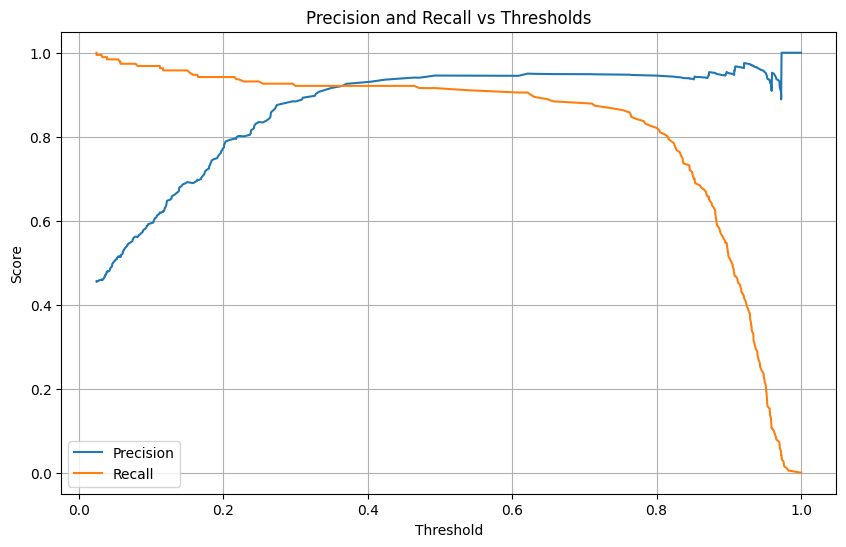

In [ ]:
## Precision Recall Curve

from sklearn.metrics import precision_recall_curve

# Predict probabilities for the test set
y_prob = best_cat_model.predict_proba(X_test)[:, 1]

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the difference between precision and recall
diff = np.abs(precision - recall)

# Find the index where the difference is minimized
crossing_idx = np.argmin(diff)

# Get the threshold value where precision and recall cross
crossing_threshold = thresholds[crossing_idx]
print(crossing_threshold)

# Append an extra threshold for visualization purposes
thresholds = np.append(thresholds, 1)

# Plot precision and recall against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the test set
y_prob = best_cat_model.predict_proba(X_test)[:, 1]

# Apply the new threshold
threshold = 0.406
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model with the new threshold
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Threshold: 0.406
Accuracy: 0.94
Confusion Matrix:
[[215  12]
 [ 15 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       227
           1       0.94      0.92      0.93       190

    accuracy                           0.94       417
   macro avg       0.94      0.93      0.93       417
weighted avg       0.94      0.94      0.94       417



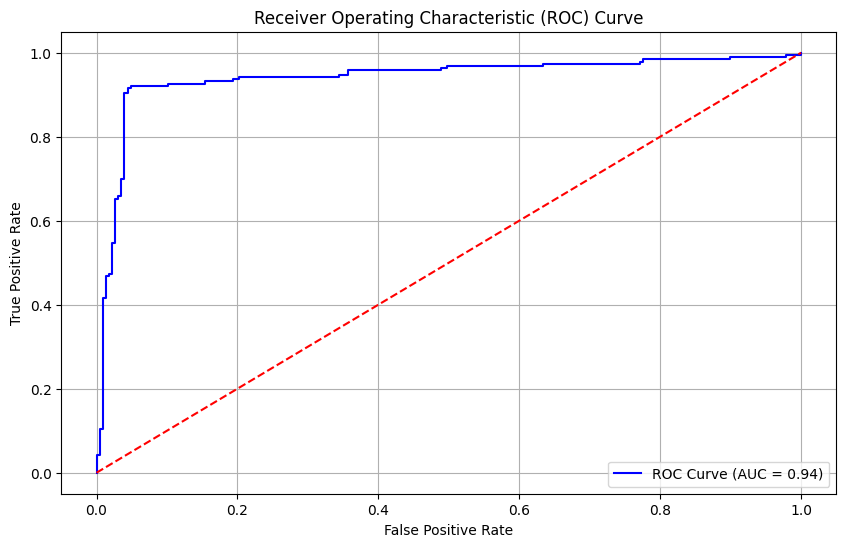

AUC Score: 0.94


In [ ]:
## ROC AUC

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
y_pred_proba = best_cat_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.2f}")

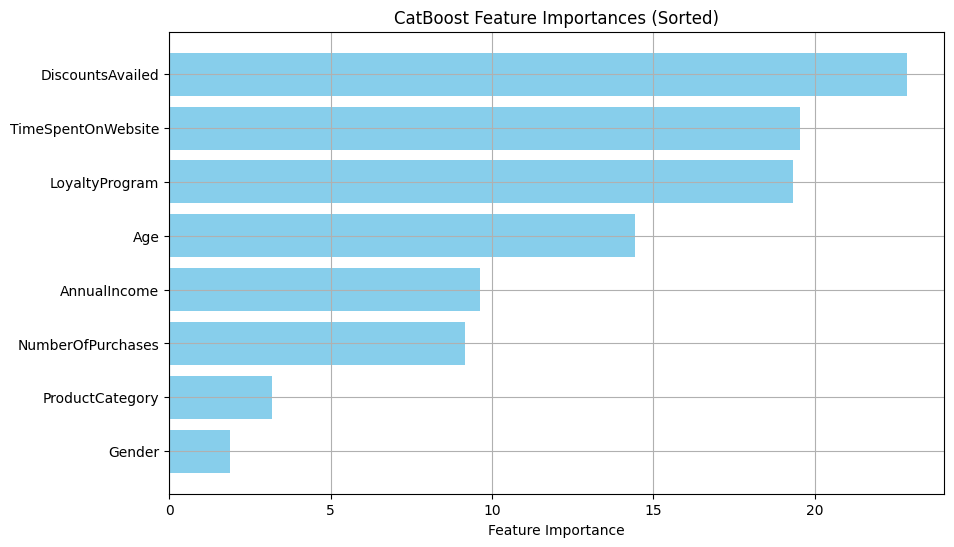

In [ ]:
## Feature Importance

feature_importances = best_cat_model.get_feature_importance()
features = X.columns

# Sort the feature importances and features
sorted_idx = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_idx]
sorted_features = features[sorted_idx]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importances (Sorted)')
plt.grid(True)
plt.show()

Age
18    23
29    22
22    21
20    20
32    20
19    19
31    19
50    18
25    18
39    17
Name: count, dtype: int64


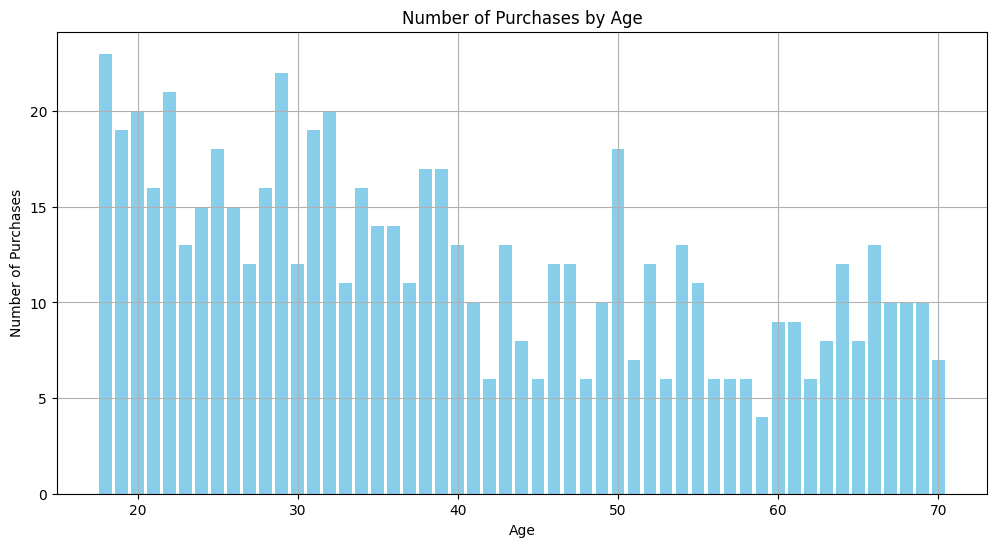

In [ ]:
# Filtering the data to include only rows where PurchaseStatus is 1
purchases = df[df['PurchaseStatus'] == 1]

# Count the number of purchases by age
purchases_by_age = purchases['Age'].value_counts().sort_index()

# Display the ages with the most purchases
print(purchases_by_age.sort_values(ascending=False).head(10))  # Top 10 ages with the most purchases

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(purchases_by_age.index, purchases_by_age.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Age')
plt.grid(True)
plt.show()

Conclusions:

CatBoost Model generated the best accuracy score of 0.94.
Decsision Tree Classifier generated accuracy score of 0.86
XB Boost generated a score of 0.90

After analyzing Feature Importance it was observed that the top four features are :
1) DiscountsAvailed
2) TimeSpentOnWebsite
3) LoyaltyProgram
4) Age

All of these features play the most crucial role in Purchasing decisions.